Hey guys!

In "External Data Disclosure Thread", I just found an intersting external dataset of weather data:
https://www.kaggle.com/selfishgene/historical-hourly-weather-data

After comparing the dataset with competition ones, amazingly I found those corresponding cites for most sites (not exact but at least very close).

Hope this helps and look forward to more findings!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# merge weather_train & weather_test
weather_train = pd.read_csv('../input/ashrae-energy-prediction/weather_train.csv')
weather_test = pd.read_csv('../input/ashrae-energy-prediction/weather_test.csv')
weather_merged = weather_train.append(weather_test)
weather_merged['timestamp'] = pd.to_datetime(weather_merged['timestamp'])
weather_merged.set_index('timestamp', inplace=True)

weather_merged

In [ ]:
#extract temperature from weather data
df_temperature_pivot = weather_merged.reset_index().pivot_table(index='timestamp', columns='site_id', values='air_temperature')
df_temperature_pivot.columns = 'site_'+df_temperature_pivot.columns.astype('str')

df_temperature_pivot

In [ ]:
#load external temperature data
temperature_external = pd.read_csv("../input/historical-hourly-weather-data/temperature.csv")
temperature_external['datetime'] = pd.to_datetime(temperature_external['datetime'])
temperature_external.set_index('datetime', inplace=True)
temperature_external = temperature_external-273.15
temperature_external = temperature_external.merge(df_temperature_pivot, left_index=True, right_index=True, how='inner')
temperature_external = temperature_external.dropna()

temperature_external

In [ ]:
#calculate correlations between sites
df_corr = temperature_external.corr(method='spearman')
list_site = df_temperature_pivot.columns
df_corr = df_corr[list_site]
df_corr = df_corr.drop(list_site)
df_corr

In [ ]:
#sns heat map
fig, ax = plt.subplots(figsize=(30,15))   
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", vmin=0.8, vmax=1.0)

In [ ]:
#Get cities!
df_findCity = pd.concat([df_corr.idxmax(),df_corr.max()], axis=1).reset_index().rename(columns={'index':'site',0:'city',1:'corr'})
df_findCity

In [ ]:
#compare sites & cities in plot
for city, site, corr in zip(df_findCity['city'],df_findCity['site'],df_findCity['corr']):
    if corr > 0.9:
        print('City: ' + city)
        print('Site: ' + site)   
        temperature_external[[city,site]].loc['2016'].plot(figsize=(15,8), alpha=0.5)
        plt.show()        

According to some discussion and study:

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/114483#661205

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113772#661207

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/114874

US sites: 0,2,3,4,6,8,9,10,13,14,15

EU sites: 1,5,12

CA sites: 7,11

Make some correction, and the summary about countries/cities is as following:

(Cities might not be 100% correct, probably just nearby)
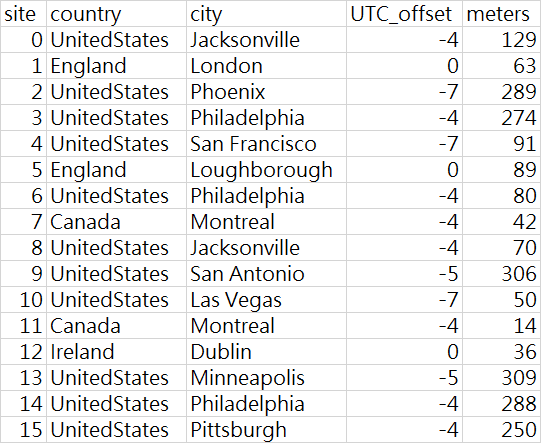